In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import chart_studio.plotly as ply
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf
import pandas as pd
from pyecharts.globals import CurrentConfig, NotebookType

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
init_notebook_mode(connected=True)
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [3]:
n = 500
gamma_dist = stats.gamma(1.01, 0, 1)
x = np.linspace(0, 100, n)
y = np.sin(x + np.pi * 1.5) / 3 + np.sqrt(x) + 1/3
df = pd.DataFrame(columns=['time', 'freq', 'value'])

In [4]:
for i in range(n):
    y_ = np.linspace(0, y[i], (round(y[i], 0) * 5 + 1).astype(int))
    z_ = gamma_dist.pdf(y_) * np.sqrt(y[i])
    df = df.append(pd.DataFrame({'time': x[i], 'freq': y_, 'value': z_}))
df.shape

(18030, 3)

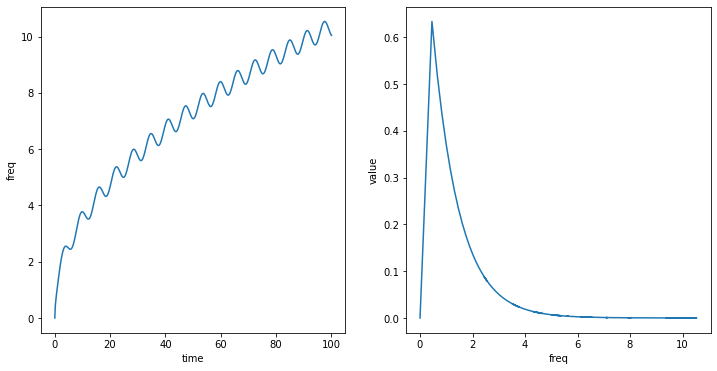

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(x, y)
ax1.set_xlabel('time')
ax1.set_ylabel('freq')
ax2.plot(y, gamma_dist.pdf(y))
ax2.set_xlabel('freq')
ax2.set_ylabel('value')
plt.show()

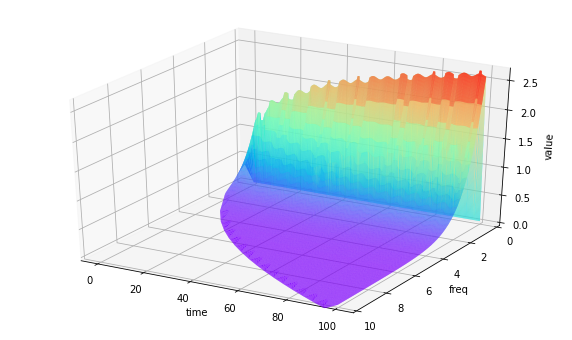

In [6]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(df['time'], df['freq'], df['value'], cmap='rainbow')
plt.ylim(10, 0)
ax.set_xlabel('time')
ax.set_ylabel('freq')
ax.set_zlabel('value')
plt.show()

In [7]:
dfbar = df.copy()
dfbar['time'] = dfbar['time'].round()
dfbar['freq'] = dfbar['freq'].round()
dfbar = dfbar.groupby(['time', 'freq'])['value'].mean().reset_index()
dfbar.shape

(820, 3)

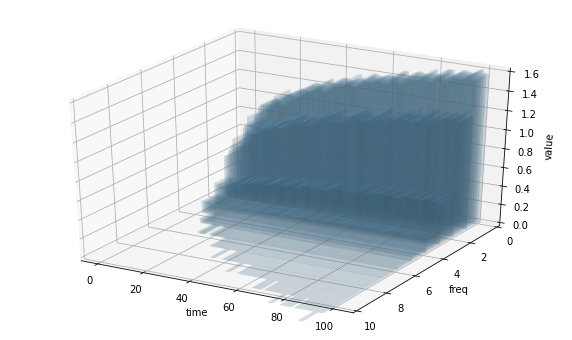

In [8]:
ax = plt.axes(projection='3d')
ax.bar3d(x=dfbar.time, y=dfbar.freq, z=0, dx=1, dy=1, dz=dfbar['value'], 
         color='#74add122', shade=True)
plt.ylim(10, 0)
ax.set_xlabel('time')
ax.set_ylabel('freq')
ax.set_zlabel('value')
plt.show()

In [40]:
from pyecharts import charts, options as opts

bar3d = (charts.Bar3D()
 .add('', dfbar.values.tolist(),
      itemstyle_opts=opts.ItemStyleOpts(opacity=0.2),
      xaxis3d_opts=opts.Axis3DOpts(name='time', type_='category'),
      yaxis3d_opts=opts.Axis3DOpts(name='freq', type_='category', min_=10, max_=0),
      zaxis3d_opts=opts.Axis3DOpts(name='value', type_='value'),
     ) 
 .set_global_opts(
     visualmap_opts=opts.VisualMapOpts(
         max_=0.6,
         range_color=[
         '#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
         '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026'])
    )
)
bar3d.load_javascript()

/Users/madlogos/anaconda3/lib/python3.7/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning:

pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)



In [41]:
bar3d.render_notebook()

In [11]:
dfbar1 = dfbar.assign(value=dfbar['freq'] * dfbar['value'])

In [12]:
bar3d = (charts.Bar3D()
 .add('', dfbar1.values.tolist(),
      itemstyle_opts=opts.ItemStyleOpts(opacity=0.2),
      xaxis3d_opts=opts.Axis3DOpts(name='time', type_='category'),
      yaxis3d_opts=opts.Axis3DOpts(name='freq', type_='category'),
      zaxis3d_opts=opts.Axis3DOpts(name='value', type_='value'),
     ) 
 .set_global_opts(
     visualmap_opts=opts.VisualMapOpts(
         max_=0.6,
         range_color=[
         '#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
         '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']))
)

/Users/madlogos/anaconda3/lib/python3.7/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning:

pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)



In [13]:
bar3d.render_notebook()

In [16]:
import pandas as pd

In [17]:
retail = pd.read_csv('~/Desktop/data.csv', encoding='ISO-8859-1')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [18]:
retail['Payment'] = retail['Quantity'] * retail['UnitPrice']

In [19]:
a1 = retail.loc[retail['Payment']>0].groupby('StockCode')['Payment'].agg(['count']).reset_index()
a2 = retail.loc[retail['Payment']>0].groupby('StockCode')['Payment'].agg(['sum']).reset_index()
a = a1.merge(a2, on='StockCode', how='right')
a.head()

,StockCode,count,sum
0,10002,71,759.89
1,10080,22,119.09
2,10120,30,40.53
3,10123C,3,3.25
4,10124A,5,6.72


In [20]:
b = a.groupby('count')['sum'].agg(['count', 'sum']).rename(columns={'count': 'n'}).reset_index()
b = pd.DataFrame({'count': [0], 'n': [0], 'sum': [0]}).append(b, ignore_index=True)
b.head()

,count,n,sum
0,0,0,0.000
1,1,158,182011.700
2,2,124,22487.300
3,3,95,4144.153
4,4,68,3025.320


In [21]:
b['freq'] = round(b['count']/100)
c = b.groupby('freq')['sum'].agg(['sum']).reset_index()
c

,freq,sum
0,0.0,638927.134
1,1.0,1364974.280
2,2.0,1482743.540
3,3.0,1239714.110
4,4.0,1183393.830
5,5.0,882840.490
6,6.0,559245.690
7,7.0,765538.470
8,8.0,366951.110
9,9.0,506115.150


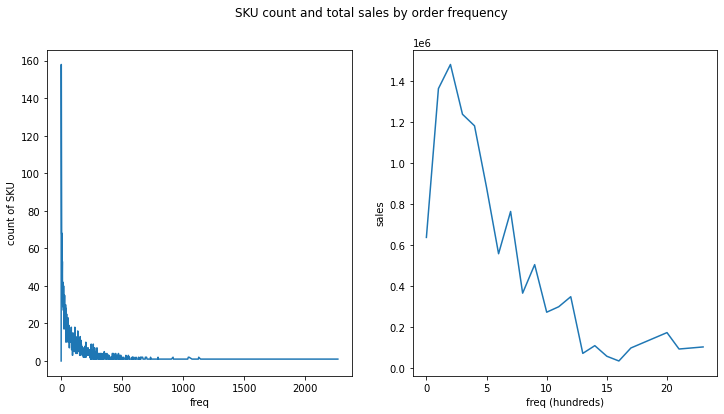

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('SKU count and total sales by order frequency')
ax1.plot(b['count'], b['n'])
ax1.set_xlabel('freq')
ax1.set_ylabel('count of SKU')
ax2.plot(c['freq'], c['sum'])
ax2.set_xlabel('freq (hundreds)')
ax2.set_ylabel('sales')
plt.show()